
# BHARAT INTERN TASK-1

## STOCK PREDICTION

### BY - ABHISHEK PATEL


**USING THE AMAZON STOCK DATASET AND PREDICTING THE PRICES USING LSTM**

## Project Goal
This project aims to develop a stock price prediction system for Amazon stock using Long Short-Term Memory (LSTM) networks.


## Project Overview

This project will involve the following steps:

- **1) Importing the dependencies**
- **2) Load and preprocess data**
- **3) Prepare sequences**
- **4) Build and train LSTM model**
- **5) Make predictions**
- **6) Plot actual vs predicted prices**
- **7) Prepare data for future predictions**
- **8) Make future predictions**
- **9) Plot future predictions**



### 1) Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

### 2) Load and preprocess data

In [2]:
data = pd.read_csv('AMZN.csv')
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

### 3) Prepare sequences

In [3]:
X = []
y = []
for i in range(60, len(data)):
    X.append(data[i-60:i, 0])
    y.append(data[i, 0])
X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

### 4) Build and train LSTM model

In [4]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
6/6 [==============================] - 3s 49ms/step - loss: 0.0799
Epoch 2/100
6/6 [==============================] - 0s 41ms/step - loss: 0.0278
Epoch 3/100
6/6 [==============================] - 0s 44ms/step - loss: 0.0138
Epoch 4/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0146
Epoch 5/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0097
Epoch 6/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0084
Epoch 7/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0076
Epoch 8/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0070
Epoch 9/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0065
Epoch 10/100
6/6 [==============================] - 0s 43ms/step - loss: 0.0062
Epoch 11/100
6/6 [==============================] - 0s 58ms/step - loss: 0.0060
Epoch 12/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0058
Epoch 13/100
6/6 [==============================]

### 5) Make predictions

In [5]:
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 1s 9ms/step


### 6) Plot actual vs predicted prices

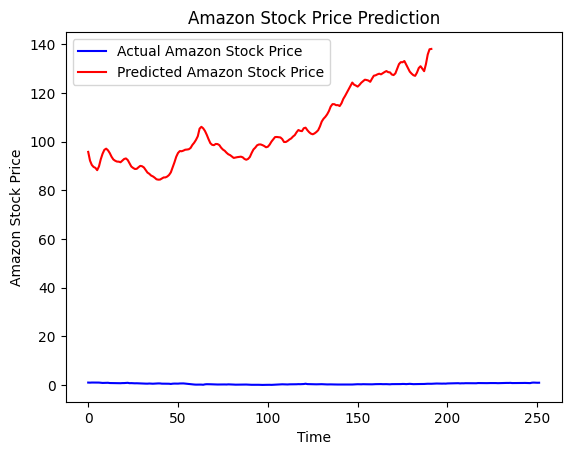

In [6]:
plt.plot(data, color='blue', label='Actual Amazon Stock Price')
plt.plot(predictions, color='red', label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

### 7) Prepare data for future predictions

In [7]:
future_X = data[-60:]
future_X = scaler.transform(future_X)
future_X = np.reshape(future_X, (1, future_X.shape[0], 1))

### 8) Make future predictions

In [8]:
future_predictions = []
for i in range(30):
    prediction = model.predict(future_X)
    future_predictions.append(prediction[0, 0])
    prediction = np.reshape(prediction, (1, 1, 1))
    future_X = np.append(future_X[:, 1:, :], prediction, axis=1)


future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 20ms/step


### 9) Plot future predictions

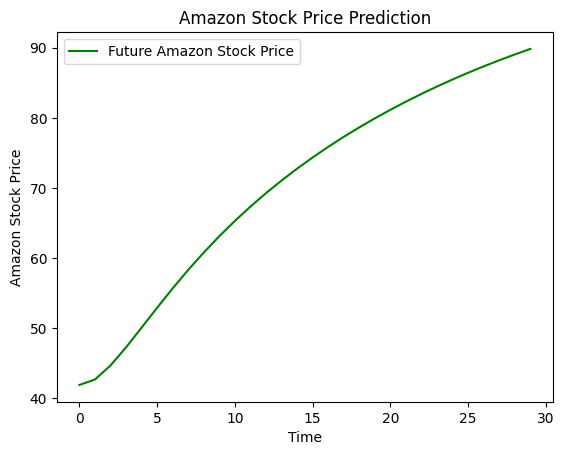

In [9]:
plt.plot(future_predictions, color='green', label='Future Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

**Conclusion:**

LSTM networks are a powerful tool for predicting stock prices. By developing an LSTM model to predict the closing price of Amazon stock, we can gain valuable insights into the stock market and make informed investment decisions.

It is important to note that stock price prediction is a complex task and no model is perfect. The LSTM model developed in this project is a good starting point, but it can be further improved by using more data, more features, and more sophisticated model architectures.

Thank you :)

- **ABHISHEK PATEL**

Github: https://github.com/abhishekpatel16

LinkedIn: https://www.linkedin.com/in/abhishekpatel16